In [2]:
#Import packages
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import io


In [8]:
col_names = ['lotarea', 'qual', 'cond', 'bsmt', 'fullbath', 'halfbath', 'bedroom', 'trag', 'fireplaces','garage','label']
data = pd.read_csv("housepricedata.csv",header=0, names=col_names)

data.head()

lotarea  qual  cond  bsmt  fullbath  halfbath  bedroom  trag  fireplaces  \
0     8450     7     5   856         2         1        3     8           0   
1     9600     6     8  1262         2         0        3     6           1   
2    11250     7     5   920         2         1        3     6           1   
3     9550     7     5   756         1         0        3     7           1   
4    14260     8     5  1145         2         1        4     9           1   

   garage  label  
0     548      1  
1     460      1  
2     608      1  
3     642      0  
4     836      1

In [10]:
# creating test and training sets
feature_cols = ['lotarea', 'qual', 'cond', 'bsmt', 'fullbath', 'halfbath', 'bedroom', 'trag', 'fireplaces','garage']#feature selection
x = data[feature_cols] # Features
y = data.loc[:,'label'] # Target variable
# Split dataset into training set and test set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [11]:
# Running the model
# Init the Gaussian Classifier
model = GaussianNB()
# Train the model
model.fit(xtrain, ytrain)
# Predict Output
pred = model.predict(xtest)


[[202  19]
 [ 34 183]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       221
           1       0.91      0.84      0.87       217

    accuracy                           0.88       438
   macro avg       0.88      0.88      0.88       438
weighted avg       0.88      0.88      0.88       438



Text(109.44999999999997, 0.5, 'Predicted')

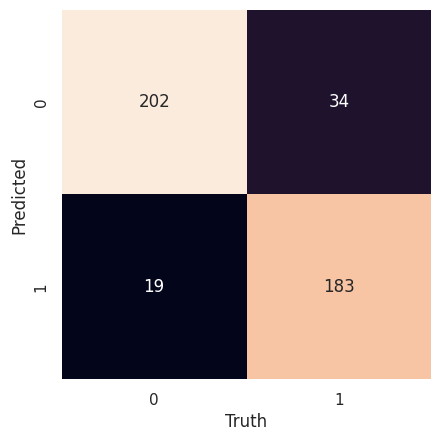

In [12]:
#Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, pred))
print(classification_report(ytest, pred))

#creating a heatmap
# Plot Confusion Matrix
mat = confusion_matrix(pred, ytest)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
